# Training Results Analysis

Visualization of training validation vs model evaluation metrics across different runs (S1, S2, M1, I1, S3).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('results_data.csv')

# Display the data
print("Raw Data:")
print(df.head(10))


Raw Data:
          Metric                Stage     S1     S2     M1     I1     S3  \
0      all_mAP50  Training Validation  0.380  0.505  0.521  0.437  0.454   
1      all_mAP50     Model Evaluation  0.457  0.624  0.609  0.600  0.616   
2   all_mAP50_95  Training Validation  0.220  0.299  0.317  0.251  0.256   
3   all_mAP50_95     Model Evaluation  0.266  0.381  0.379  0.337  0.379   
4  all_Precision  Training Validation  0.624  0.674  0.677  0.792  0.655   
5  all_Precision     Model Evaluation  0.533  0.749  0.713  0.771  0.807   
6     all_Recall  Training Validation  0.311  0.445  0.459  0.396  0.412   
7     all_Recall     Model Evaluation  0.333  0.459  0.462  0.388  0.390   
8      car_mAP50  Training Validation  0.715  0.782  0.823  0.729  0.735   
9      car_mAP50     Model Evaluation  0.474  0.594  0.607  0.763  0.550   

      M2  
0  0.453  
1  0.608  
2  0.250  
3  0.316  
4  0.703  
5  0.801  
6  0.401  
7  0.364  
8  0.721  
9  0.535  


In [2]:
# Configuration
runs = ['S1', 'S2', 'M1', 'I1', 'S3', 'M2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown
stages = ['Training Validation', 'Model Evaluation']

# Get unique metrics
metrics = df['Metric'].unique()

print(f"Found {len(metrics)} metrics to visualize")
print(f"Metrics: {list(metrics)}")


Found 16 metrics to visualize
Metrics: ['all_mAP50', 'all_mAP50_95', 'all_Precision', 'all_Recall', 'car_mAP50', 'car_Precision', 'car_Recall', 'truck_bus_mAP50', 'truck_bus_Precision', 'truck_bus_Recall', 'pedestrian_mAP50', 'pedestrian_Precision', 'pedestrian_Recall', 'cyclist_mAP50', 'cyclist_Precision', 'cyclist_Recall']


✓ Saved results_overall.png


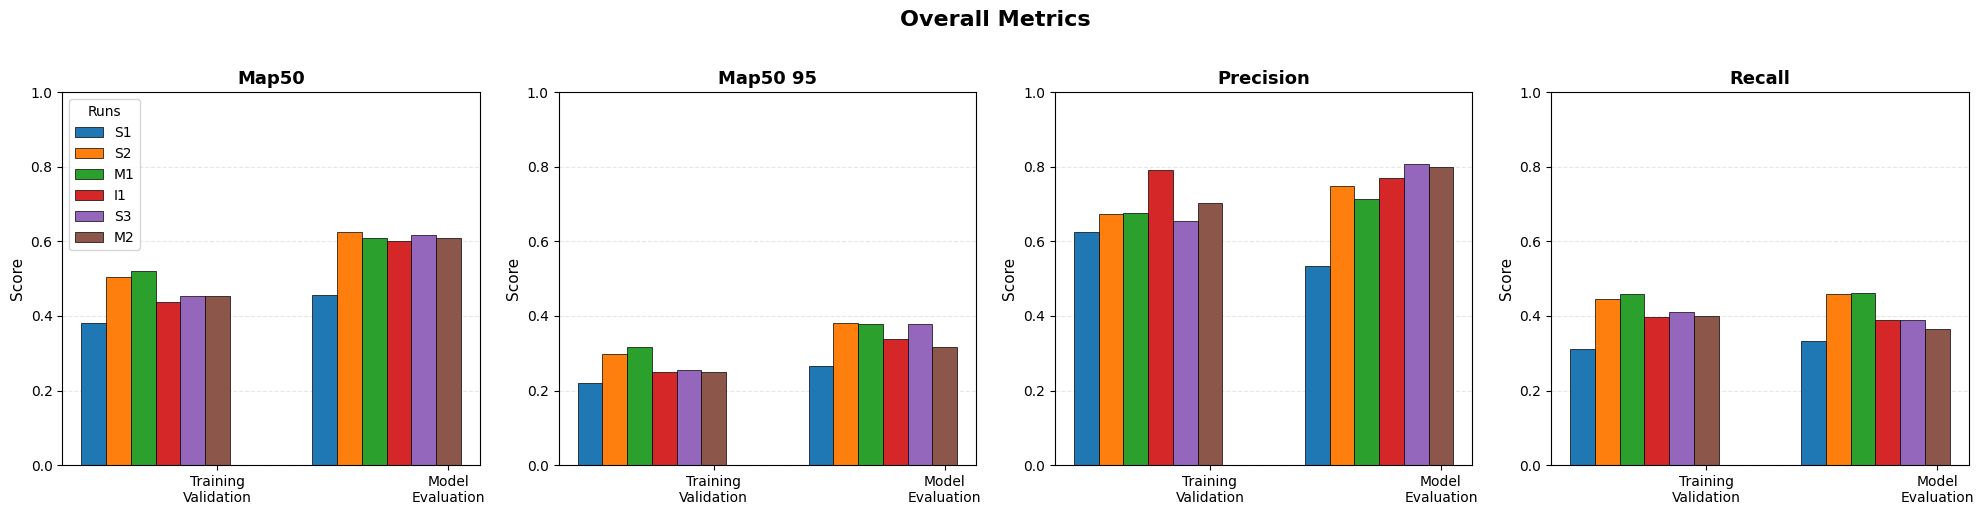

✓ Saved results_car.png


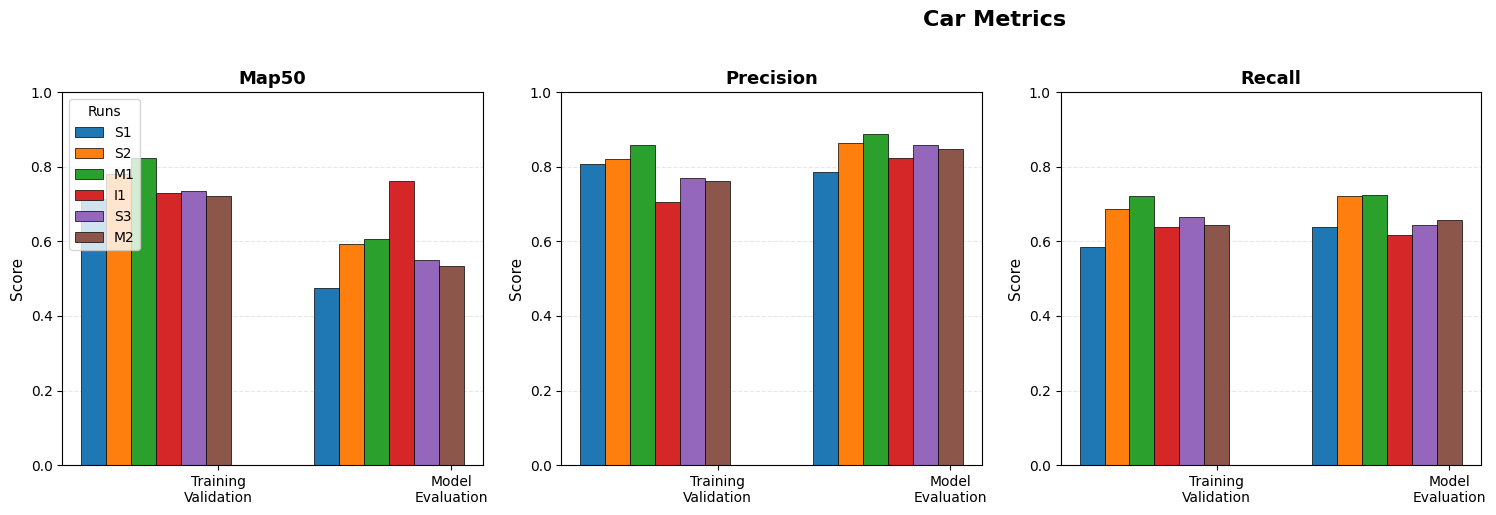

✓ Saved results_truck_bus.png


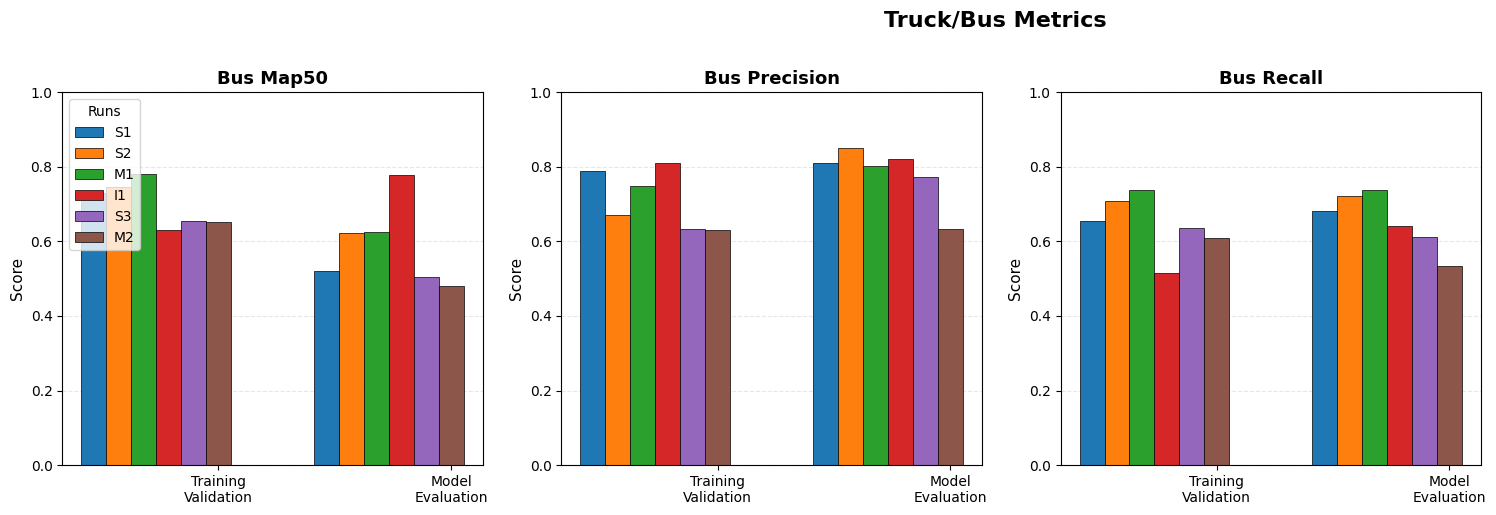

✓ Saved results_pedestrian.png


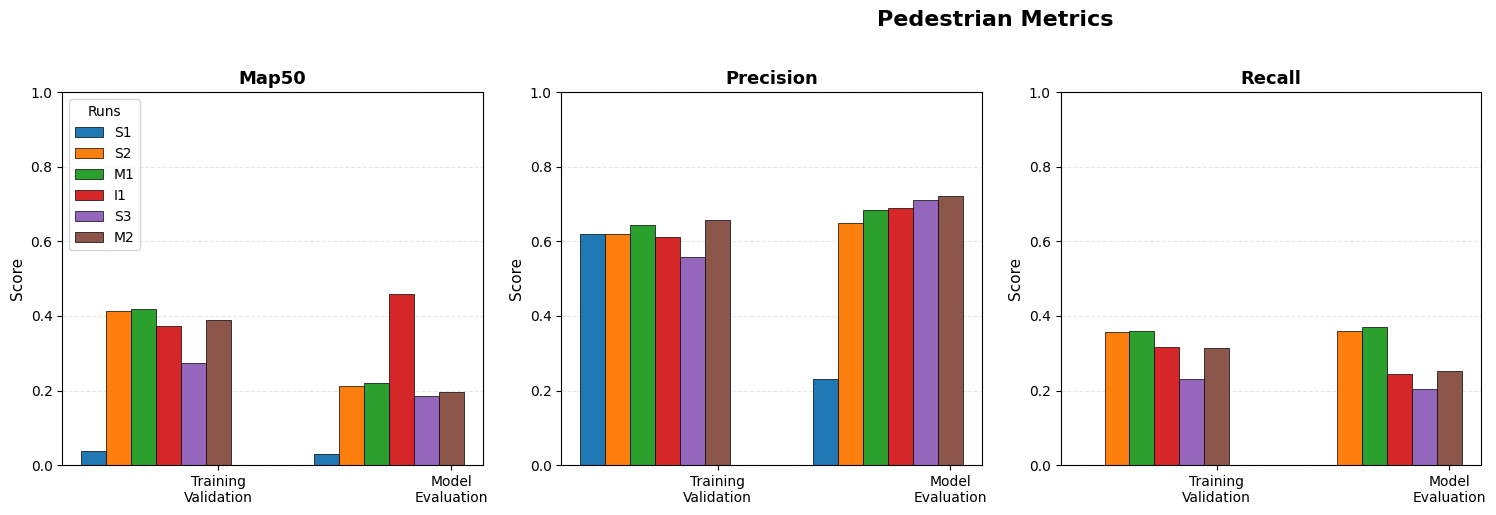

✓ Saved results_cyclist.png


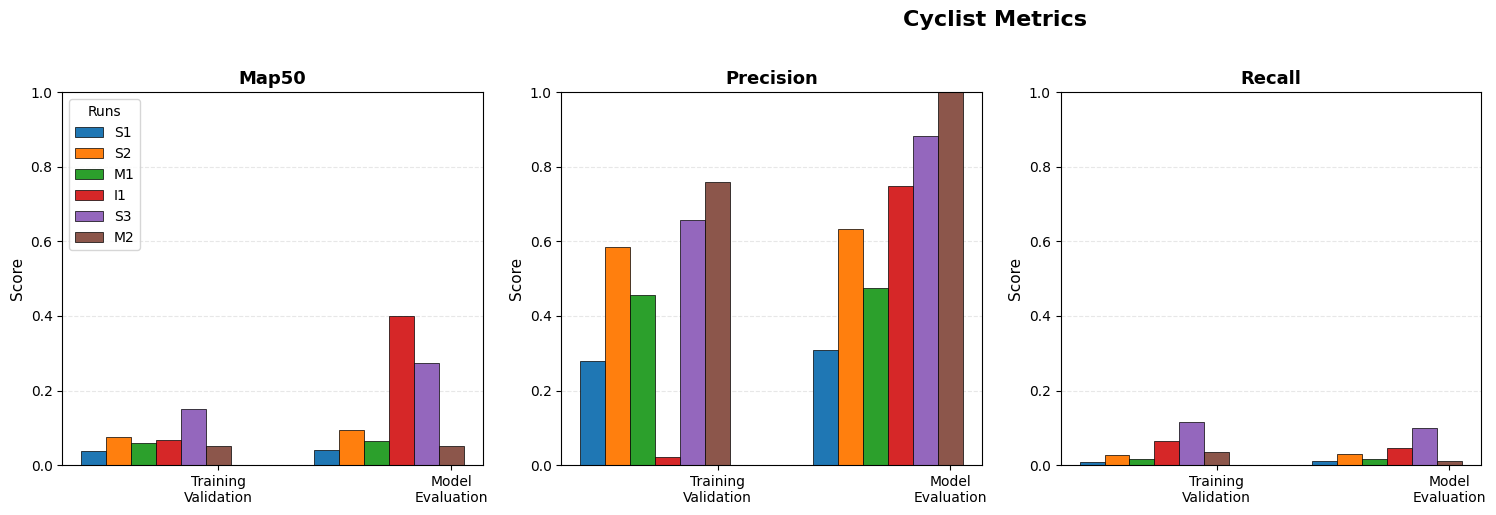


✓ All visualizations saved


In [3]:
# Define categories and their metrics
categories = {
    'Overall': ['all_mAP50', 'all_mAP50_95', 'all_Precision', 'all_Recall'],
    'Car': ['car_mAP50', 'car_Precision', 'car_Recall'],
    'Truck/Bus': ['truck_bus_mAP50', 'truck_bus_Precision', 'truck_bus_Recall'],
    'Pedestrian': ['pedestrian_mAP50', 'pedestrian_Precision', 'pedestrian_Recall'],
    'Cyclist': ['cyclist_mAP50', 'cyclist_Precision', 'cyclist_Recall']
}

# Bar configuration
bar_width = 0.15
stage_gap = 0.5

# Create a figure for each category
for category_name, category_metrics in categories.items():
    # Create figure with 1 row x 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Plot each metric for this category
    for idx, metric in enumerate(category_metrics):
        ax = axes[idx]
        
        # Get data for this metric
        metric_data = df[df['Metric'] == metric]
        
        if len(metric_data) == 0:
            ax.set_visible(False)
            continue
        
        # Plot bars for each stage
        for stage_idx, stage in enumerate(stages):
            stage_data = metric_data[metric_data['Stage'] == stage]
            
            if len(stage_data) == 0:
                continue
                
            # Center position for this stage cluster
            center = stage_idx * (len(runs) * bar_width + stage_gap)
            
            # Plot bars for each run
            for run_idx, run in enumerate(runs):
                value = stage_data[run].values[0] if len(stage_data) > 0 else None
                
                # Skip if value is missing
                if pd.isna(value):
                    continue
                
                try:
                    value = float(value)
                except:
                    continue
                
                # Position for this bar
                x = center + (run_idx - len(runs)/2) * bar_width + bar_width/2
                
                # Plot bar
                ax.bar(x, value, bar_width, label=run if stage_idx == 0 and idx == 0 else '', 
                       color=colors[run_idx], edgecolor='black', linewidth=0.5)
        
        # Set labels and title
        metric_label = metric.split('_', 1)[1] if '_' in metric else metric
        ax.set_ylabel('Score', fontsize=11)
        ax.set_title(metric_label.replace('_', ' ').title(), fontsize=13, fontweight='bold')
        
        # Set x-ticks
        stage_centers = [(i * (len(runs) * bar_width + stage_gap) + (len(runs)-1)*bar_width/2) 
                         for i in range(len(stages))]
        ax.set_xticks(stage_centers)
        ax.set_xticklabels([s.replace(' ', '\n') for s in stages], fontsize=10)
        
        # Grid
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        # Set y-axis range to 0-1 for all plots
        ax.set_ylim(0, 1)
    
    # Hide unused subplots (for categories with only 3 metrics)
    for idx in range(len(category_metrics), 4):
        axes[idx].set_visible(False)
    
    # Add legend to the first subplot
    if len(category_metrics) > 0:
        axes[0].legend(title='Runs', loc='upper left', fontsize=10)
    
    # Add category title
    fig.suptitle(f'{category_name} Metrics', fontsize=16, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    filename = f'results_{category_name.lower().replace("/", "_")}.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    print(f"✓ Saved {filename}")
    plt.show()

print("\n✓ All visualizations saved")


In [ ]:
# Summary statistics
print("\n" + "="*80)
print("SUMMARY: Training Validation vs Model Evaluation")
print("="*80)

for metric in ['all_mAP50', 'all_mAP50_95', 'all_Precision', 'all_Recall']:
    metric_data = df[df['Metric'] == metric]
    
    print(f"\n{metric.replace('_', ' ').upper()}:")
    print("-" * 40)
    
    for run in runs:
        train_val = metric_data[metric_data['Stage'] == 'Training Validation'][run].values[0]
        model_eval = metric_data[metric_data['Stage'] == 'Model Evaluation'][run].values[0]
        
        try:
            train_val = float(train_val)
            model_eval = float(model_eval)
            diff = ((model_eval - train_val) / train_val) * 100
            direction = "↑" if diff > 0 else "↓"
            print(f"{run}: Train={train_val:.3f}, Eval={model_eval:.3f} ({direction}{abs(diff):.1f}%)")
        except:
            print(f"{run}: Training={train_val}, Evaluation={model_eval}")
